In [1]:
# This program is based on the Udemy course "Python for Finance: Investment Fundamentals & Data Analytics" 
# by Martin and Ned from 365
# Link to the course: https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/
# This is a jupyter notebook file, better to run in jupyter notebook enviorment.
# Author: Martin and Ned, 365 Team. 
# Updated by: Kuo L. 2022-02-01
# Use this script to compare expected performance with actual performance with 3 year increments.

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# It uses yahoo finance api to get close price for each ticker stock/ETF.
# use any 3 tickers, I just use vanguard ETFs.
# you can put more than 3 tickers, just note that the more tickers in, 
# the more calculation needed to plot efficient frontier. change num_simulation to a higher number as needed.

num_simulation = 3000
assets = ['COST', 'VUG', 'VOO','CMCSA','AAPL', 'VTI', 'VYM']
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2019-1-1', end = '2022-1-1')['Adj Close'] 

In [3]:
pf_data.head() #makre sure companies were public at starting date

,COST,VUG,VOO,CMCSA,AAPL,VTI,VYM
Date,,,,,,,
2019-01-02,194.150757,131.077271,218.244217,32.375893,38.277527,121.519745,70.912560
2019-01-03,190.035629,127.065651,213.034607,32.630230,34.464802,118.703682,69.623558
2019-01-04,195.554077,132.121704,220.066193,33.732353,35.936077,122.632866,71.647827
2019-01-07,196.274719,133.468719,221.717285,33.374393,35.856094,123.869659,71.992760
2019-01-08,197.744385,135.098755,223.871368,33.647568,36.539619,125.144501,72.582787


In [4]:
pf_data.tail() #check companies still open and public at ending date

,COST,VUG,VOO,CMCSA,AAPL,VTI,VYM
Date,,,,,,,
2021-12-27,562.617249,325.089996,438.809998,50.221329,180.100540,242.960007,111.690002
2021-12-28,563.785522,323.640015,438.480011,50.261131,179.061859,242.460007,111.940002
2021-12-29,566.910767,323.760010,439.010010,50.340736,179.151749,242.600006,112.160004
2021-12-30,563.056580,322.480011,437.769989,50.340736,177.973251,242.210007,111.970001
2021-12-31,566.840881,320.899994,436.570007,50.082020,177.344055,241.440002,112.110001


<AxesSubplot:xlabel='Date'>

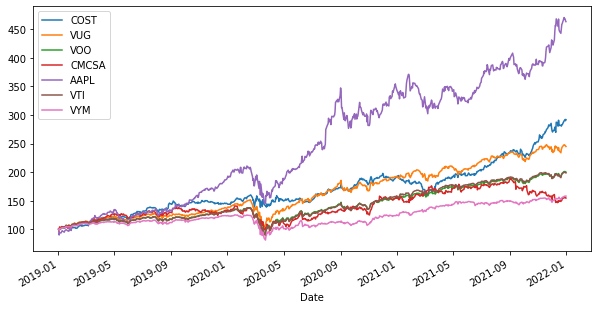

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [7]:
log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

COST     0.354313
VUG      0.296079
VOO      0.229277
CMCSA    0.144262
AAPL     0.507020
VTI      0.227032
VYM      0.151466
dtype: float64

In [8]:
log_returns.cov() * 250 #get coveriance between each pair.

,COST,VUG,VOO,CMCSA,AAPL,VTI,VYM
COST,0.047826,0.034834,0.031222,0.028536,0.042815,0.030274,0.026787
VUG,0.034834,0.058434,0.051822,0.042955,0.069865,0.051989,0.042771
VOO,0.031222,0.051822,0.050417,0.044523,0.059868,0.050428,0.046485
CMCSA,0.028536,0.042955,0.044523,0.079930,0.046222,0.044397,0.044626
AAPL,0.042815,0.069865,0.059868,0.046222,0.115805,0.059248,0.046548
VTI,0.030274,0.051989,0.050428,0.044397,0.059248,0.050907,0.046477
VYM,0.026787,0.042771,0.046485,0.044626,0.046548,0.046477,0.048473


In [9]:
log_returns.corr() #get correlation between each pair.

,COST,VUG,VOO,CMCSA,AAPL,VTI,VYM
COST,1.000000,0.658919,0.635833,0.461531,0.575303,0.613550,0.556346
VUG,0.658919,1.000000,0.954752,0.628534,0.849302,0.953201,0.803656
VOO,0.635833,0.954752,1.000000,0.701358,0.783504,0.995378,0.940310
CMCSA,0.461531,0.628534,0.701358,1.000000,0.480427,0.696000,0.716946
AAPL,0.575303,0.849302,0.783504,0.480427,1.000000,0.771648,0.621285
VTI,0.613550,0.953201,0.995378,0.696000,0.771648,1.000000,0.935612
VYM,0.556346,0.803656,0.940310,0.716946,0.621285,0.935612,1.000000


***

In [10]:
num_assets = len(assets)
pfolio_returns = []
pfolio_volatilities = []

w_lst = []

for i in range(num_assets):
    w_lst.append([])

# Followig generate the simulation
for x in range (num_simulation):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    for i in range(num_assets):
        w_lst[i].append(weights[i])

    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

for i in range(num_assets):
    w_lst[i] = np.array(w_lst[i])

# pfolio_returns, pfolio_volatilities, w_lst[0], w_lst[1], w_lst[2]

In [11]:
# build simulated portfolios.
df_build = {'Return': pfolio_returns, 'Volatility': pfolio_volatilities}
for w in range(num_assets):
    df_build[assets[w]] = w_lst[w]
portfolios = pd.DataFrame(df_build)

In [12]:
portfolios.head() #checking to see if any error

,Return,Volatility,COST,VUG,VOO,CMCSA,AAPL,VTI,VYM
0,0.284385,0.218766,0.167288,0.172244,0.208420,0.120171,0.149228,0.074984,0.107666
1,0.238111,0.221698,0.111557,0.019675,0.248582,0.344895,0.105951,0.087894,0.081447
2,0.285638,0.228690,0.064384,0.147795,0.292835,0.015031,0.181780,0.164479,0.133697
3,0.318026,0.221582,0.258376,0.070559,0.003493,0.127112,0.252996,0.193679,0.093784
4,0.295641,0.218917,0.205131,0.200407,0.266892,0.121894,0.137151,0.065234,0.003290


In [13]:
portfolios.tail() #checking to see if any error

,Return,Volatility,COST,VUG,VOO,CMCSA,AAPL,VTI,VYM
2995,0.252480,0.217238,0.105121,0.024639,0.223185,0.094352,0.130704,0.171618,0.250381
2996,0.306355,0.224850,0.163075,0.259355,0.247490,0.053393,0.170834,0.062073,0.043781
2997,0.244375,0.214260,0.246362,0.121118,0.127614,0.378147,0.042415,0.041465,0.042878
2998,0.259614,0.219501,0.112552,0.148374,0.009370,0.205748,0.168042,0.064391,0.291523
2999,0.291099,0.215130,0.222250,0.245863,0.202448,0.049976,0.103800,0.088617,0.087046


In [14]:
portfolios.sort_values(by=['Volatility']) # Sort by volatility. Theoretically the portfolio with lowest valatility is the best one.

,Return,Volatility,COST,VUG,VOO,CMCSA,AAPL,VTI,VYM
1278,0.265672,0.198619,0.381382,0.158281,0.020399,0.001768,0.000408,0.161913,0.275849
2593,0.240165,0.200093,0.293535,0.070613,0.191157,0.088725,0.008032,0.024531,0.323406
1216,0.241529,0.200253,0.290323,0.062144,0.227819,0.044484,0.011312,0.010012,0.353906
2040,0.233498,0.200482,0.295263,0.113130,0.016765,0.176225,0.008839,0.034423,0.355356
991,0.243623,0.200849,0.314108,0.005252,0.082399,0.157482,0.028086,0.164341,0.248332
...,...,...,...,...,...,...,...,...,...
530,0.367397,0.249334,0.142865,0.332241,0.037267,0.058074,0.373843,0.046343,0.009369
954,0.306640,0.249432,0.015952,0.210259,0.068208,0.365705,0.333327,0.004538,0.002011
2125,0.331231,0.250290,0.007408,0.211673,0.157031,0.077530,0.351639,0.145102,0.049618
2925,0.358499,0.250467,0.118309,0.203512,0.019476,0.165503,0.417561,0.063726,0.011914


Text(0, 0.5, 'Expected Return')

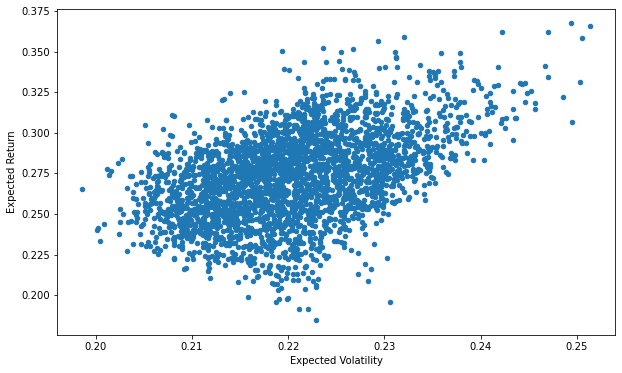

In [15]:
# check the plot
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [16]:
# #generate path and name then export
# path = 'results/'
# name = '_'.join(assets) + '.csv'
# path_name = path + name 
# portfolios.sort_values(by=['Volatility']).to_csv(path_name)

In [17]:
# calculation
print("money amount calculation for demo use only, please don't simply invest on this results alone.")

sorted_portfolios = portfolios.sort_values(by=['Volatility']).head(1)

total_investment = 25000
print("Intend to invest ${:.2f}".format(total_investment) + " total.")

for i in range(num_assets):
    inv = total_investment * sorted_portfolios[assets[i]].iloc[0]
    print("\tinvest in " + assets[i] + " for ${:.2f}".format(inv) + ".")

print("Expected annual portfolio return is {:.1f}".format(sorted_portfolios['Return'].iloc[0]*100) + "%")
print("Expected annual portfolio volatility is {:.1f}".format(sorted_portfolios['Volatility'].iloc[0]*100) + "%")

money amount calculation for demo use only, please don't simply invest on this results alone.
Intend to invest $25000.00 total.
	invest in COST for $9534.54.
	invest in VUG for $3957.04.
	invest in VOO for $509.97.
	invest in CMCSA for $44.21.
	invest in AAPL for $10.20.
	invest in VTI for $4047.82.
	invest in VYM for $6896.24.
Expected annual portfolio return is 26.6%
Expected annual portfolio volatility is 19.9%


# above is the expected return using 3-year data
# below is the actual return using 1 year data.

In [18]:
pf_data_actual = pd.DataFrame()
invested_weights = []

for i in range(num_assets):
    invested_weights.append(sorted_portfolios[assets[i]].iloc[0])
invested_weights = np.array(invested_weights)

for a in assets:
    pf_data_actual[a] = wb.DataReader(a, data_source = 'yahoo', start = '2021-1-1', end = '2022-1-1')['Adj Close'] 

log_returns_actual = np.log(pf_data_actual / pf_data_actual.shift(1))   #compute actual daily log return for all stocks

#get actual portfolio return
print("Actual annual portfolio return is {:.1f}".format(np.sum(invested_weights * log_returns_actual.mean()) * 250 *100) + "%")
#get actual portfolio volatility
print("Actual annual portfolio volatility is {:.1f}".format(np.sqrt(np.dot(invested_weights.T,np.dot(log_returns_actual.cov() * 250, invested_weights)))*100) +"%")


Actual annual portfolio return is 30.8%
Actual annual portfolio volatility is 12.9%
